## Approximating linear regression with Tensorflow example using MPG Dataset

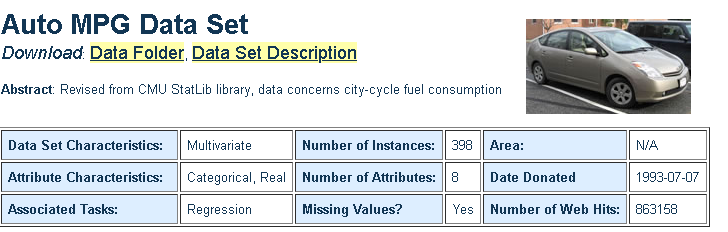


Dataset description:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

At the end of this notebook you will know how to create a neural network that follows the same logic as a linear regression.

### Load the dataset

In [1]:
import pandas as pd
url          = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [56]:
df.dtypes

Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
dtype: object

### Clean data - removing NA's

In [2]:
df  = df.dropna()

### Train/test split

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
# Assume you have a dataset with features X and labels y
X = np.array(df.drop('MPG',axis=1))   
y = np.array(df.pop('MPG') )  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model training: Create a linear regression model with tensorflow to predict MPG

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Build the neural network architecture
# Start with a normalization layer to scale the inputs (X-m)/sd

# Write your solution here
normalization  = tf.keras.layers.Normalization(axis=-1)
normalization.adapt(X_train)

# Configurations
hidden_layer  = 500 # size of the 1 hidden layer with 500 nodes 
output_size   = 1 
learning_rate = 0.01
loss_function = 'mean_squared_error'
batch_size    = 30
# Build the model
model = keras.Sequential()
model.add(normalization) # first layer
model.add(keras.layers.Dense(hidden_layer,  activation='relu')) # second layer
model.add(keras.layers.Dense(output_size)) # output 

model.compile(keras.optimizers.Adam(learning_rate=learning_rate), loss_function)

history = model.fit(X_train, y_train, epochs =  100, batch_size = 30,validation_batch_size= None ,validation_split=0.2,verbose=None  )



- A neural network with a single hidden layer and linear activation function (such as the relu activation) can approximate a linear regression model.

- This will train a model to predict MPG (miles per gallon), using the features in X_train to predict the targets in y_train. 

- The architecture:
    - normalization layer, 
    - single hidden layer with 500 nodes and ReLU activation, 
    - output layer with 1 node for a single prediction. 

The model uses the Adam optimizer with a learning rate of 0.01, and it's trained for 100 epochs with a batch size of 32 to minimize the mean squared error loss.

Plotting the training and validation loss

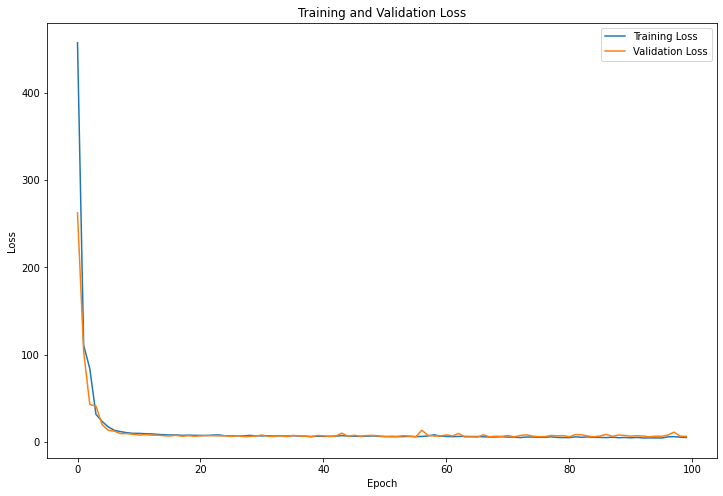

In [6]:
import matplotlib.pyplot as plt

# This will provide insight into whether your model is underfitting, overfitting, or just right.

plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Model predicition and evaluation on the test set

In [52]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
y_preds = model.predict(X_test)
print(mean_squared_error(y_preds,y_test))

3/3 [==============================] - 0s 1ms/step
7.4922615890686926


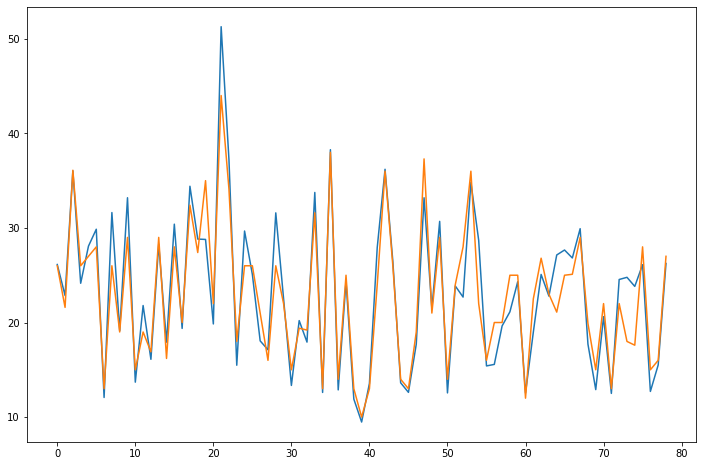

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(y_preds, label='Predicitons')
plt.plot(y_test, label='True labels')
plt.show()

We can see models performance by how close the predictions are on the test data. The MSE is not very small.

Thank you for reaching the end of this notebook! Were I demonstrate a simple example on how create a 'linear regression model' with tensorflow.